# Plot the figure to visulise the correlated gene-region association

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/id_label/result_for_All/merged_data_All.csv')
data = data.drop(columns=['Unnamed: 0'])

In [3]:
probe_id = pd.read_csv('../data/id_label/result_for_All/resultAll4.csv')

In [4]:
probe_id_with_name = probe_id[['gene_symbol','probe_id', 'r']]
probe_id_with_name = probe_id_with_name.astype({'probe_id': str})

In [5]:
positive_gene = probe_id_with_name.iloc[:10]
negative_gene = probe_id_with_name.iloc[19182:19192]

In [6]:
positive_gene

,gene_symbol,probe_id,r
0,KLK8,1030058,0.511251
1,KCTD4,1031532,0.502307
2,SLC22A9,1036268,0.496801
3,NPPA,1053623,0.491904
4,MGP,1054175,0.488538
5,SLC22A10,1022660,0.477740
6,CYP26B1,1041221,0.475519
7,PTPN3,1010756,0.468659
8,HTR2C,1055289,0.447073
9,PNMT,1052927,0.444349


In [7]:
negative_gene = negative_gene.sort_values(by='r', ascending=True)

In [10]:
def melt(df):
    my_dict = {}
    for _id in df['probe_id'].values:
        my_dict[_id] = df.loc[df['probe_id']==_id, 'gene_symbol'].values[0]
    columns = list(df['probe_id'].values)
    columns.append('EBM_Stage')
    melted_data = data[columns].melt(id_vars='EBM_Stage')
    melted_data = melted_data.rename(columns={'EBM_Stage':'EBM Stage', 'variable':'Genes', 'value':'Expression'})
    melted_data['Genes'] = melted_data['Genes'].map(my_dict)
    return melted_data

KeyError: "['EMB_Stage'] not in index"

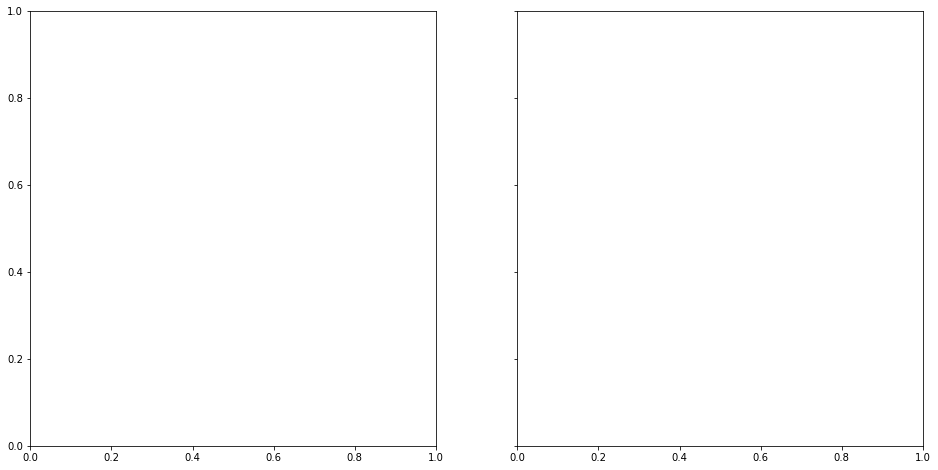

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
sns.stripplot(data=melt(positive_gene), x='EMB Stage', y='Expression', hue='Genes', ax=ax1, 
              palette=sns.color_palette("rocket", n_colors=10))
sns.stripplot(data=melt(negative_gene), x='EMB Stage', y='Expression', hue='Genes', ax=ax2, 
              palette=sns.color_palette("rocket", n_colors=10))
plt.subplots_adjust(wspace=0.5)
ax1.set_title("Positive Genes")
ax2.set_title("Negative Genes")
ax1.legend(bbox_to_anchor=(1.1, .9))
ax2.legend(bbox_to_anchor=(1.1, .9))